<a href="https://colab.research.google.com/github/park-moonkyu/prophet/blob/main/final_prophet(1215).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/"
else:
    data_location = "../"

  Cloning https://github.com/ourownstory/neural_prophet.git to /tmp/pip-req-build-tesrynce
  Running command git clone -q https://github.com/ourownstory/neural_prophet.git /tmp/pip-req-build-tesrynce
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 4.2MB/s 
  Created wheel for neuralprophet: filename=neuralprophet-0.2.8-cp36-none-any.whl size=56718 sha256=8aa5c9ed6fa59334a4d908b5c15d9bc4c2175ab036e5a40fd0c131852b79fec6
  Stored in directory: /tmp/pip-ephem-wheel-cache-ymo6x0hn/wheels/5a/29/25/58347b486c135e3aaa41f629bace08cfb3e92d08c65d2b4acf
Successfully built neuralprophet
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [47]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet

df = pd.read_csv('./final_data.csv')

df=df[['DT','SALE_SUM_AMT']]
df1 = df.sort_values(by='DT' ,ascending=True)
df1=df1[:-41]
test=df1[-52:]
train=df1[:-53]
df1.rename(columns={'DT':'ds','SALE_SUM_AMT':'y'},inplace=True)
train.rename(columns={'DT':'ds','SALE_SUM_AMT':'y'},inplace=True)
test.rename(columns={'DT':'ds','SALE_SUM_AMT':'y'},inplace=True)
test.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




,ds,y
290,2019-01-01 00:00:00,1.296608e+10
101,2019-01-08 00:00:00,1.162013e+10
215,2019-01-15 00:00:00,1.364648e+10
23,2019-01-22 00:00:00,1.510215e+10
142,2019-01-29 00:00:00,1.717471e+10


In [30]:
m = NeuralProphet()
m.fit(train, freq="D")

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProph

INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 5.34E-01
INFO:NP.forecaster:learning rate range test found optimal lr: 5.34E-01
Epoch[151/151]: 100%|██████████| 151/151 [00:09<00:00, 16.61it/s, SmoothL1Loss=0.0225, MAE=2.91e+9, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.672180,1.995169e+10,0.0
1,0.246621,1.040113e+10,0.0
2,0.102282,6.520710e+09,0.0
3,0.060443,5.108150e+09,0.0
4,0.036565,3.618939e+09,0.0
...,...,...,...
146,0.022766,2.947489e+09,0.0
147,0.022647,2.933472e+09,0.0
148,0.022617,2.923214e+09,0.0
149,0.022563,2.914797e+09,0.0


In [36]:
future = m.make_future_dataframe(df=train, periods=365)
forecast = m.predict(df=future)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning:

Setting attributes on ParameterDict is not supported.



Setting attributes on ParameterDict is not supported.




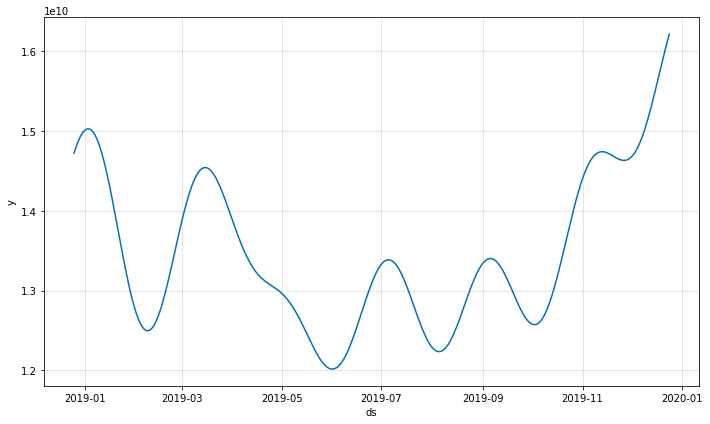

In [39]:
fig = m.plot(forecast)

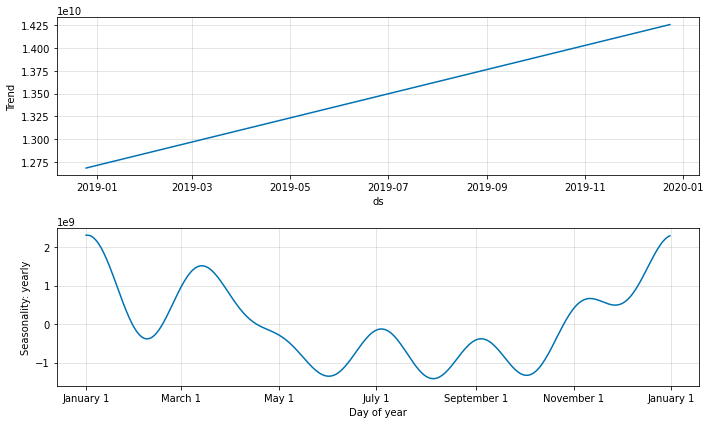

In [40]:
fig_comp = m.plot_components(forecast)


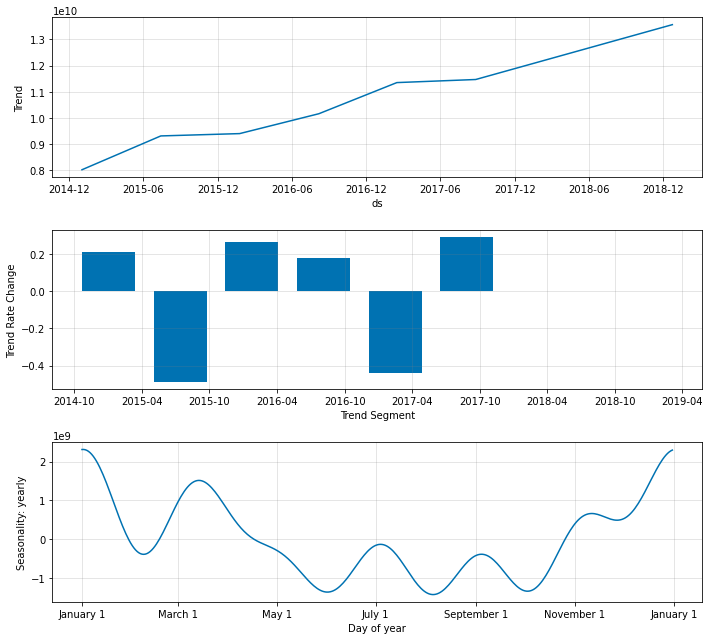

In [41]:
fig_param = m.plot_parameters()

In [46]:
m = NeuralProphet()

train_metrics = m.fit(train, freq="D")
val_metrics = m.test(test)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProph

INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 2.31E-01
INFO:NP.forecaster:learning rate range test found optimal lr: 2.31E-01
Epoch[151/151]: 100%|██████████| 151/151 [00:08<00:00, 18.34it/s, SmoothL1Loss=0.0225, MAE=2.92e+9, RegLoss=0]
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss            MAE
1         0.021 3014609664.000
INFO:NP.forecaster:Validation metrics:    SmoothL1Loss            MAE
1         0.021 3014609664.000


In [49]:
# or evaluate while training
m = NeuralProphet()
metrics = m.fit(df1, freq="D", validate_each_epoch=True, valid_p=0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 8
INFO:NP.config:Auto-set batch_size to 8
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 150
INFO:NP.config:Auto-set epochs to 150
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:550: UserWarning:

Setting attributes on ParameterDict is not supported.



Setting attributes on ParameterDict is not supported.




INFO - (NP.forecaster._lr_range_test) - learning rate range test found optimal lr: 1.87E-01
INFO:NP.forecaster:learning rate range test found optimal lr: 1.87E-01
Epoch[150/150]: 100%|██████████| 150/150 [00:08<00:00, 17.30it/s, SmoothL1Loss=0.0224, MAE=2.9e+9, RegLoss=0, MAE_val=2.98e+9, SmoothL1Loss_val=0.0211]
